In [7]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data269  data.txt


In [8]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [9]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 122kB 13.6MB/s eta 0:00:01


In [10]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#读取数据集
data = np.loadtxt('./data/data.txt', delimiter=',')
x, y = data[:, 0]/100, data[:, 1]/100

In [13]:
#获取数据个数
m = len(y)
#设输入层输入X第一列设为1，便于和网络参数的偏置项相乘
X = np.ones((m, 2))
X[:, 1] = data[:, 0]/100

#初始网络参数
theta = np.zeros((2, 1))


#迭代次数和学习率
iterations = 5000
alpha = 0.01

In [14]:
def compute_cost(X, y, theta):
    #计算线性回归的代价，均方误差代价函数
    m = len(y)
    J = 0.0

    for i in range(m):
        J = J + (theta[0] + theta[1] * X[i,1] - y[i])**2
        
    J=J/(2*m)
    return J

In [15]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """执行梯度下降算法来学习参数 theta。"""
    m = len(y)
    J_history = np.zeros((num_iters,))

    for iter in range(num_iters):
        # 计算给定 theta 参数下线性回归的梯度，实现梯度下降算法
        j0=0
        j1=0
        for i in range(m):
            j0=j0 + theta[0] + theta[1]*X[i,1] - y[i]
        j0=j0/m
        theta[0]=theta[0] - alpha * j0
        for i in range(m):
            j1=j1 + (theta[0] + theta[1]*X[i,1] - y[i]) * X[i,1]
        j1=j1/m
        theta[1]=theta[1] - alpha * j1
        # 将各次迭代后的代价进行记录

        J_history[iter] = compute_cost(X, y, theta)

    return theta, J_history

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
print(theta)
print(J_history)

[[-0.3706757 ]
 [ 6.83197201]]
[21.62073058 20.86596311 20.14016433 ...  1.18178281  1.1817795
  1.18177619]


In [16]:
def plot_data(x, y, theta):
    plt.figure()
    #绘制x与y的离散点图
    
    plt.xlabel("Influencing factors of housing price")
    plt.ylabel("housing price")
    plt.plot(x,y,"rx",markersize=2,markeredgewidth=1)

    #绘制回归曲线
    plot_regression(theta)
    plt.show()

def plot_regression(theta):
    x = np.linspace(0, 200, 100)
    y = lambda x: theta[1] * x + theta[0]
    plt.plot(x, y(x), 'g')

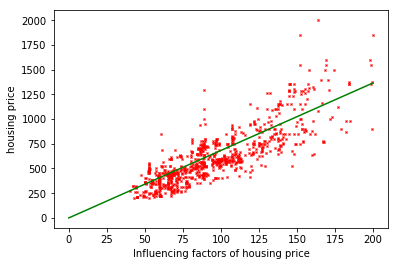

In [17]:
#读取数据
data = np.loadtxt('./data/data.txt', delimiter=',')
x1, y1 = data[:, 0], data[:, 1]
#绘制数据散点图和回归曲线于同一幅图像中
plot_data(x1, y1, theta)
plt.show()

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 